# Information Rate (Extra Simulations)

In our paper we consdered $n=7$ and $k=4$, which gives an information rate of  $R=\dfrac{4}{7}$. But we did not investigate other information rates. Hence, here we consider three other information rates, $R=1$ ,$R=1.5$, $R=2$. We observe the same general trends as in the paper, the adversarial attack is also effective for other rates. We think this is due to the fact that the vulnerability to adversarial attacks is not due to the selected set of hyperparameters. Rather, it is an inherent characteristic of DNNs \[3,4,5\].


## Citing this notebook:
If you use any part of this code, please consider citing our following works:

- M. Sadeghi and E. G. Larsson, "Physical Adversarial Attacks Against End-to-End Autoencoder Communication Systems," in IEEE Communications Letters. 

- M. Sadeghi and E. G. Larsson, “Adversarial attacks on deep-learning based radio signal classification,” IEEE Wireless Commun. Lett., vol. 8, no. 1, pp. 213–216, Feb. 2019. 

In [1]:
import matplotlib.pyplot as plt   
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from All_Autoencoder_Classes import AE_inf_rate

### 1. Our System Set Up
Below you can see our system specifications, which help you re-drive the same results.

In [2]:
import tensorflow as tf
tf.__version__

'1.7.0'

In [3]:
%%system
nvcc --version

['nvcc: NVIDIA (R) Cuda compiler driver',
 'Copyright (c) 2005-2017 NVIDIA Corporation',
 'Built on Fri_Sep__1_21:08:03_CDT_2017',
 'Cuda compilation tools, release 9.0, V9.0.176']

### 2. Creating and Training the Models
Let us create three different models with three different information rates.

In [4]:
n = 4
k_array = np.array([4,6,8])
seed = 0
ebnodbs = np.linspace(0,14,15,dtype=int)
montcarlo = 1000000

# Training Parameters
train_EbNodB =  8.5
val_EbNodB = train_EbNodB
training_params = [
    #batch_size, lr, ebnodb, iterations
    [1000    , 0.001,  train_EbNodB, 1000],
    [1000    , 0.0001, train_EbNodB, 10000],
    [10000   , 0.0001, train_EbNodB, 10000]]
validation_params = [
    #batch_size, ebnodb, val_steps 
    [100000, val_EbNodB, 100],
    [100000, val_EbNodB, 1000],
    [100000, val_EbNodB, 1000]]

for k in k_array:
    model_file = 'models_inf_rate/ae_k_{}_n_{}'.format(k,n)
    print('Training a model while the information rate is:', k/n)
    ae = AE_inf_rate(k,n,seed, filename=None) 
    p = np.zeros([1,2,n])
    ae.train(p, training_params, validation_params)
    ae.save(model_file) 
    

Training a model while the information rate is: 1.0

Batch Size: 1000, Learning Rate: 0.001, EbNodB: 8.5, Iterations: 1000
0.88142
0.19724
0.0022900105
0.0003399849
0.00028002262
0.00014001131
0.00015997887
0.000100016594
9.000301e-05
9.000301e-05

Batch Size: 1000, Learning Rate: 0.0001, EbNodB: 8.5, Iterations: 10000
5.0008297e-05
7.998943e-05
6.997585e-05
6.0021877e-05
2.002716e-05
5.0008297e-05
5.0008297e-05
2.002716e-05
1.001358e-05
2.002716e-05

Batch Size: 10000, Learning Rate: 0.0001, EbNodB: 8.5, Iterations: 10000
2.002716e-05
0.0
2.002716e-05
1.001358e-05
5.0008297e-05
6.0021877e-05
2.9981136e-05
2.002716e-05
0.0
1.001358e-05
Training a model while the information rate is: 1.5

Batch Size: 1000, Learning Rate: 0.001, EbNodB: 8.5, Iterations: 1000
0.99262
0.4767
0.20050001
0.06410003
0.008000016
0.0012099743
0.0005300045
0.0004299879
0.00031000376
0.00023001432

Batch Size: 1000, Learning Rate: 0.0001, EbNodB: 8.5, Iterations: 10000
0.0002400279
0.00016999245
0.00011998415
0.0

### 3. Attacking the Models
Now we attack the models and check the impact of information rate.

INFO:tensorflow:Restoring parameters from models_inf_rate/ae_k_4_n_4
The information rate is: 1.0
UAP finished!
psr -2 finished!
psr -6 finished!
psr -10 finished!


<Figure size 432x288 with 0 Axes>

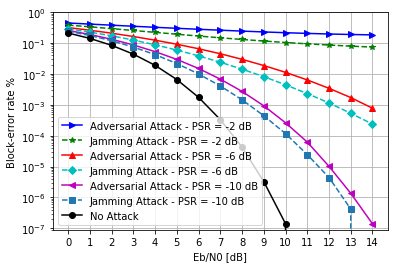

INFO:tensorflow:Restoring parameters from models_inf_rate/ae_k_6_n_4
The information rate is: 1.5
UAP finished!
psr -2 finished!
psr -6 finished!
psr -10 finished!


<Figure size 432x288 with 0 Axes>

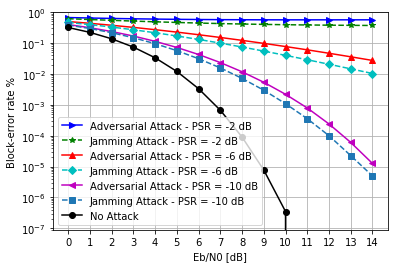

INFO:tensorflow:Restoring parameters from models_inf_rate/ae_k_8_n_4
The information rate is: 2.0
UAP finished!
psr -2 finished!
psr -6 finished!
psr -10 finished!


<Figure size 432x288 with 0 Axes>

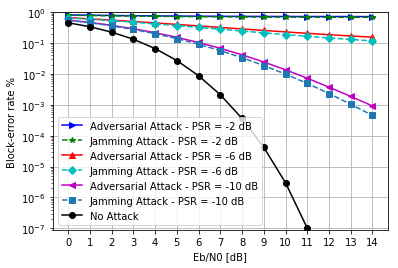

In [5]:
for k in k_array:
    # create an instance of the autoencoder class
    model_file = 'models_inf_rate/ae_k_{}_n_{}'.format(k,n)
    ae = AE_inf_rate(k,n,seed, filename=model_file)
    #
    print('The information rate is:', k/n)
    # create the UAP
    PSR_dB=-6
    num_samples = 10
    ebnodb = 0
    UAP = ae.UAPattack_fgm(ebnodb,num_samples,PSR_dB)
    print('UAP finished!')
    ############################################
    PSR_dB = -2
    BLER_no_attack_uap_fgm2, BLER_attack_uap_fgm2, BLER_jamming1_uap_fgm2 = ae.bler_sim_attack_AWGN(UAP.reshape(1,2,n), PSR_dB, ebnodbs, montcarlo, 50)
    print('psr -2 finished!')

    PSR_dB = -6
    BLER_no_attack_uap_fgm6, BLER_attack_uap_fgm6, BLER_jamming1_uap_fgm6 = ae.bler_sim_attack_AWGN(UAP.reshape(1,2,n), PSR_dB, ebnodbs, montcarlo, 50)
    print('psr -6 finished!')

    PSR_dB = -10
    BLER_no_attack_uap_fgm10, BLER_attack_uap_fgm10, BLER_jamming1_uap_fgm10 = ae.bler_sim_attack_AWGN(UAP.reshape(1,2,n), PSR_dB, ebnodbs, montcarlo, 50)
    print('psr -10 finished!')

    BLER_no_attack = (BLER_no_attack_uap_fgm2  + BLER_no_attack_uap_fgm6 +  BLER_no_attack_uap_fgm10) / 3

    
    plt.figure()
    fig, ax = plt.subplots()
    ax.plot(ebnodbs,BLER_attack_uap_fgm2,'b>-',label='Adversarial Attack - PSR = -2 dB')
    ax.plot(ebnodbs,BLER_jamming1_uap_fgm2,'g*--',label='Jamming Attack - PSR = -2 dB')

    ax.plot(ebnodbs,BLER_attack_uap_fgm6,'r^-',label='Adversarial Attack - PSR = -6 dB')
    ax.plot(ebnodbs,BLER_jamming1_uap_fgm6,'cD--',label='Jamming Attack - PSR = -6 dB')

    ax.plot(ebnodbs,BLER_attack_uap_fgm10,'m<-',label='Adversarial Attack - PSR = -10 dB')
    ax.plot(ebnodbs,BLER_jamming1_uap_fgm10,'s--',label='Jamming Attack - PSR = -10 dB')

    ax.plot(ebnodbs,BLER_no_attack,'ko-',label='No Attack')

    plt.yscale('log')
    plt.legend(loc='lower left')
    plt.xticks(ebnodbs,ebnodbs)
    ax.set_xlabel('Eb/N0 [dB]')
    ax.set_ylabel('Block-error rate %')
    ax.grid(True)
    plt.ylim(9e-08, 0.9835103120767782)
    plt.show()

# References
\[1\] M. Sadeghi and E. G. Larsson, "Physical Adversarial Attacks Against End-to-End Autoencoder Communication Systems," in IEEE Communications Letters.

\[2\] - M. Sadeghi and E. G. Larsson, “Adversarial attacks on deep-learning based radio signal classification,” IEEE Wireless Commun. Lett., vol. 8, no. 1, pp. 213–216, Feb. 2019.

\[3\] N. Papernot, P. D. McDaniel, and I. J. Goodfellow, “Transferability in machine learning: from phenomena to black-box attacks using adversarial samples,” CoRR, vol. abs/1605.07277, 2016

\[4\] C. Szegedy, W. Zaremba, I. Sutskever, J. Bruna, D. Erhan, I. Goodfellow, and R. Fergus, “Intriguing properties of neural networks,” arXiv preprint arXiv:1312.6199, 2013.

\[5\] I. J. Goodfellow, J. Shlens, and C. Szegedy, “Explaining and harnessing adversarial examples,” arXiv preprint arXiv:1412.6572, 2014.